# 1.Loading Libraries

In [419]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import statsmodels.api as sm

from sklearn.datasets import load_boston

from scipy.stats import skew, kurtosis

%matplotlib inline

# 2.loading dataset

In [420]:
# loading dataset
boston = load_boston()

# check the type of dataset
type(boston)

sklearn.utils.Bunch

In [421]:
# print the keys 
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [422]:
# description of the database
print(boston.feature_names, '\n')
print('-'*100)
print(boston.DESCR)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT'] 

----------------------------------------------------------------------------------------------------
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weigh

In [423]:
# load the boston data
data = boston.data
type(data)

numpy.ndarray

In [424]:
# covert boston data into dataframe
boston_df = pd.DataFrame(data, columns=boston.feature_names)

# adding target column to the boston dataframe
boston_df['price'] = boston.target

# covert column name to lower case
boston_df.columns =  boston_df.columns.str.lower()

# displaying the first five row
boston_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


# 3. Understanding the data

In [425]:
# get basic statistical detail
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [426]:
# check if there is any null value in the dataset
boston_df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

There is not null value in the data set, as all the column shows zero
***

# 3. Data visualization
First we will use scatter plot to visualize the data, where we can visualize pair wise relationship and correlation among
independent variables

It is quite usefull to get a quick over view of the data and also to find out any outliers in the data

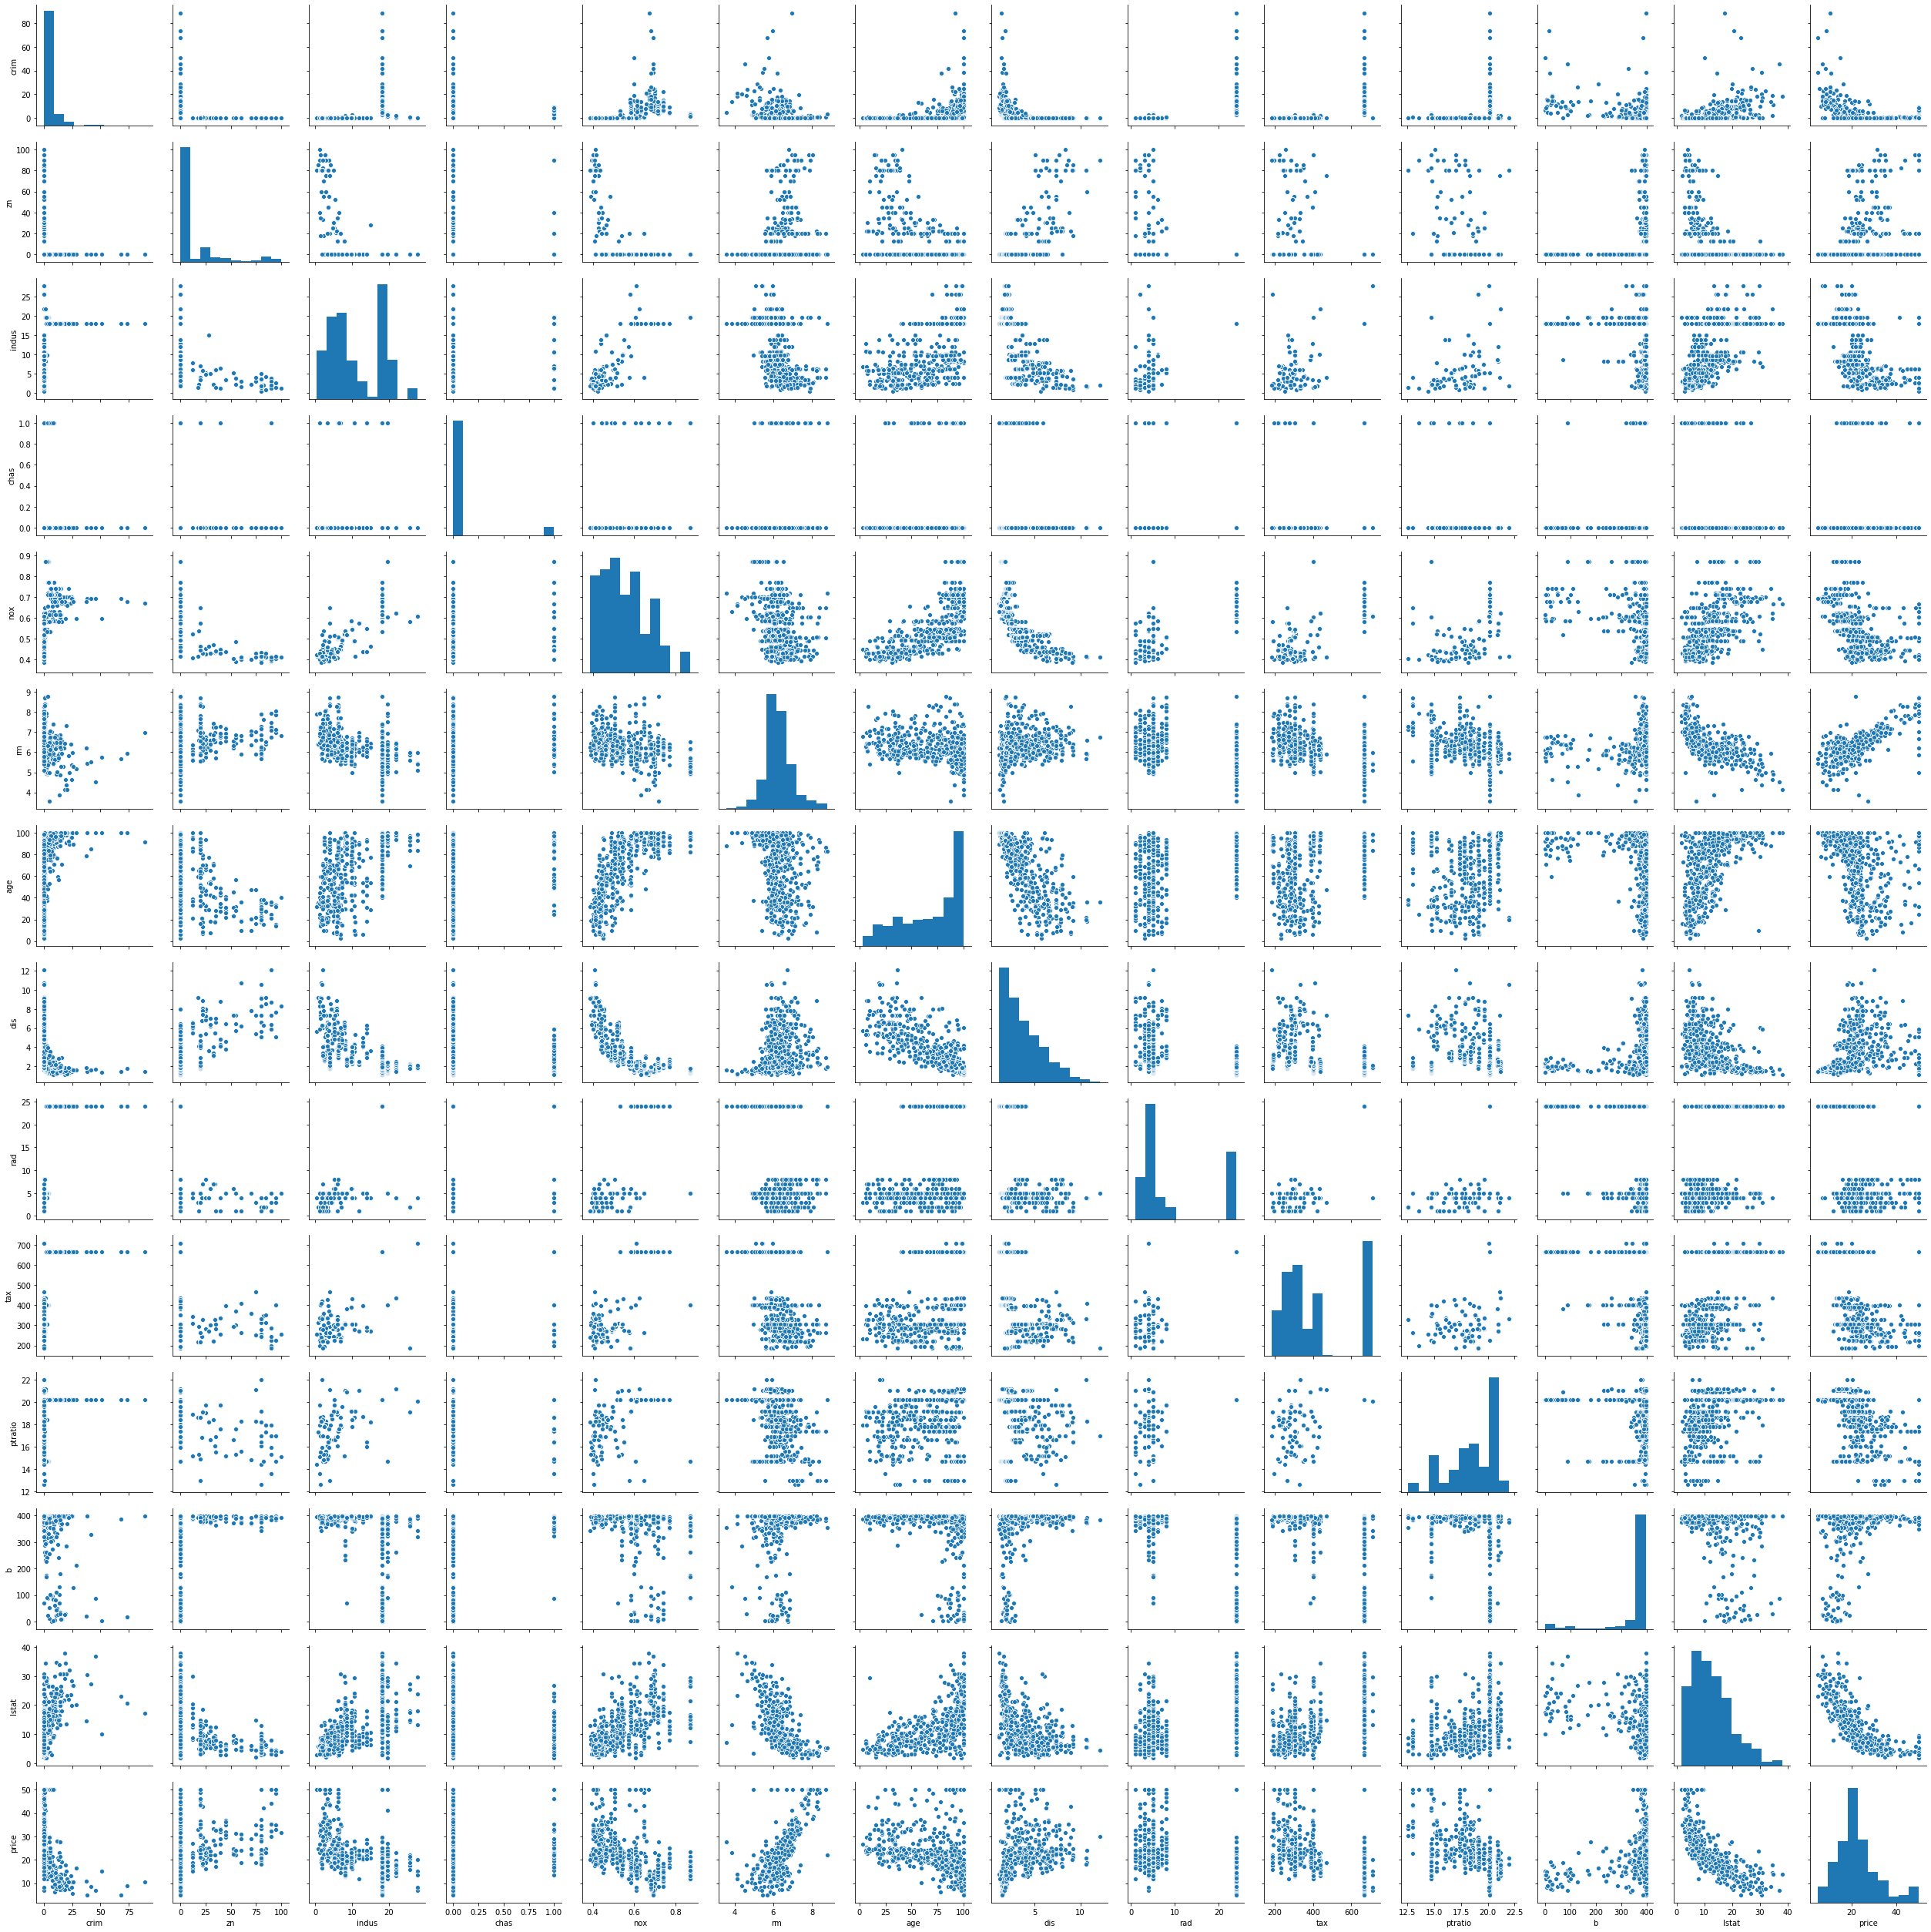

In [427]:
# scatter plot to visualize the pairwise relationship

sns.pairplot(boston_df)

### Distribution plot

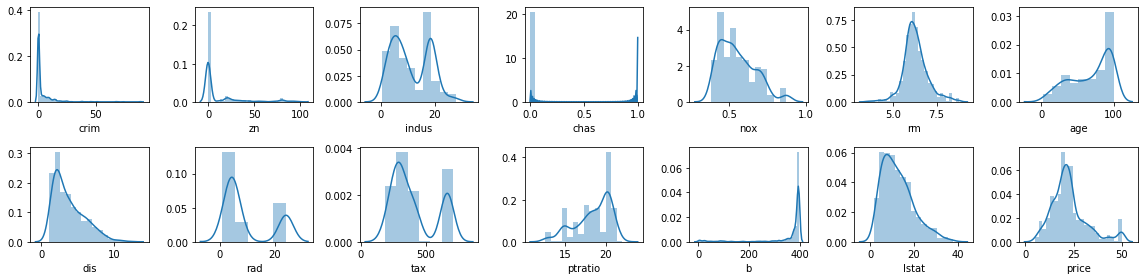

In [428]:
# distribution plot
rows = 2
cols = 7

fig, ax = plt.subplots(nrows = rows, ncols = cols, figsize=(16,4))

col = boston_df.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.distplot(boston_df[col[index]], ax = ax[i][j])
        index += 1

# for proper space between the graph
plt.tight_layout()

we are going to create a correlation metrix to quantify and summerize the relationship between variables.

The correlation metrix is closely related with covariance metrix, infact it is a rescale version of covariance metrix computed from standardize features.

It is a square metrix (with same number of rows and columns) that contains the person correlation coefficient.

In [357]:
# correlation matrix
cormat = boston_df.corr()
cormat

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


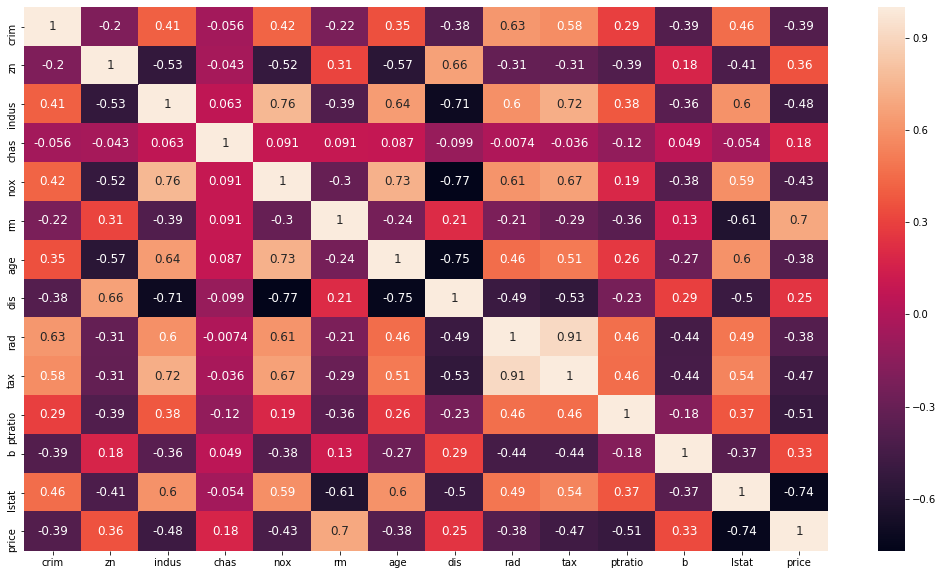

In [429]:
# create the heatmap to visualize correaltion

fig, ax = plt.subplots(figsize = (18, 10))
sns.heatmap(cormat, annot = True, annot_kws = {'size': 12})

In [432]:
# get all the features that is correlated with the target variable

def getCorrelatedFeature(corrdata, threshold):
    featuer = []
    value = []
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index]) > threshold:
            featuer.append(index)
            value.append(corrdata[index])

    
    df = pd.DataFrame(data = value, index=featuer, columns=['Corr value'])
    return df

In [433]:
threshold = 0.50
cor_feature = getCorrelatedFeature(cormat['price'], threshold)
cor_feature

,Corr value
rm,0.695360
ptratio,-0.507787
lstat,-0.737663
price,1.000000


with the above output we got only those features which are highly co realted with the pric column which is our output columns.

The above features will make out model fairly simple and make more strong predictions.

In [434]:
# we will be using only these feature in our model

cor_feature.index.values

array(['rm', 'ptratio', 'lstat', 'price'], dtype=object)

In [435]:
# copying selected feature from the main datafarme(boston_df)

correlated_data = boston_df[cor_feature.index]
correlated_data.head()

,rm,ptratio,lstat,price
0,6.575,15.3,4.98,24.0
1,6.421,17.8,9.14,21.6
2,7.185,17.8,4.03,34.7
3,6.998,18.7,2.94,33.4
4,7.147,18.7,5.33,36.2


### pairplot and corrmat of correlated data

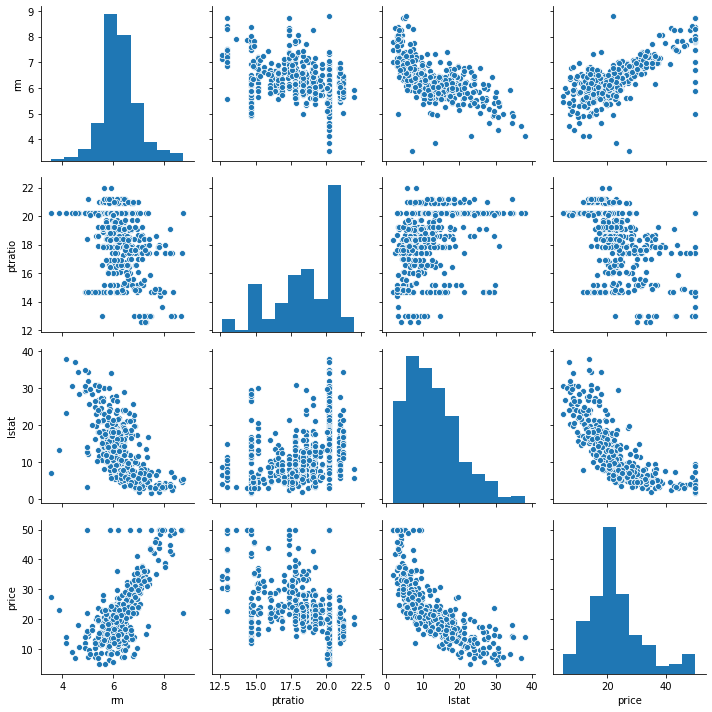

In [436]:
# visualizing the correlation

sns.pairplot(correlated_data)
plt.tight_layout()

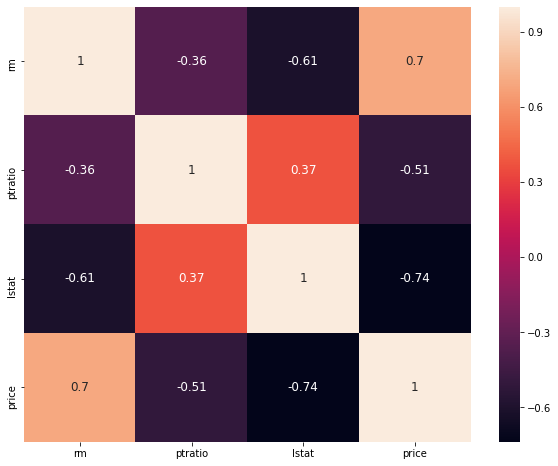

In [437]:
# visualizing the heatmap

fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(correlated_data.corr(), annot=True, annot_kws={'size': 12})

# 4. Shuffle and split the data

In [438]:
# define input and output variable
x = correlated_data.drop('price', axis=1)
y = correlated_data[['price']]

# spliting the data into train and test set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [439]:
# printing out x_train and x_test size
x_train.shape, x_test.shape

((404, 3), (102, 3))

In [440]:
# creating instance of out model
linear_model = LinearRegression()

# fitting data into out model
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [441]:
# making prediciton
y_predict = linear_model.predict(x_test)

# printing first five prediction
y_predict[:5]


array([[27.87445626],
       [28.27689602],
       [18.57937819],
       [23.34416858],
       [18.87315027]])

# 5. Defining performance metrics

### Coefficient of Determination (r2)

Typically performance mesaurement is done trough some kind of error calculation, or the goodness of it or throught some kind of usefull measurement. 
In this project we will be calculating the coefficient of determination R2 , to quantify the model performance.

R2 is a usefull a usefull statistic in regression analysis, and its often describe how "good" the model is to make prediction.

The value is R2 range from 0 to 1.
- model with 0 range will fail to predict the target variable
- model with 1 will perfectly predit the target variable

In [442]:
r2 = r2_score(y_test, y_predict)
print("The r2 Score is: {}".format(r2))

The r2 Score is: 0.6959056368091425


### Regressoin Evaluation Metrices

Here are three common evalutaion matrix for regression
- **Mean Absolute Error (MAE)** is the mean of the absolute value of the error
- **Mean Squared Error (MSE)** is the mean of the square error
- **Root Mean Squared Error (RMSE)** is the square root of the mean squared error

Comparisng these metrics:
- MAE -> is the easiest to understand, because it is the average error
- MSE -> is more popular then MAE because MSE "punish" large error, which tend to be usefull in the real world
- RMSE -> is even more popular then MES because it interpretable in the 'Y' unit

In [443]:
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
rmse = math.sqrt(mse)

# display the output
print("MSE {:.3}".format(mse))
print("MAE {:.3}".format(mae))
print("RMSE {:.3}".format(rmse))

MSE 30.1
MAE 4.28
RMSE 5.48


### store feature performance

In [444]:
total_feature = []
total_feature_name = []
selected_correlation_value = []
r2_scores = []
mae_value = []
mse_value = []

In [445]:
def performance_metrics(feature, th, y_true, y_pred):
    score = r2_score(y_test, y_predict)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    total_feature.append(len(feature)-1)
    total_feature_name.append(str(feature))
    selected_correlation_value.append(th)
    r2_scores.append(score)
    mae_value.append(mae)
    mse_value.append(mse)
    
    
    metrics_df = pd.DataFrame(data = [total_feature_name, total_feature, selected_correlation_value, mae_value, mse_value, r2_scores], 
                              index = ['Feature name', 'total no of feature', 'Correlation value', 'MAE', 'MSE', 'R2_score'])
    
    return metrics_df.T

In [446]:
performance_metrics(correlated_data.columns.values, threshold, y_test, y_predict)

,Feature name,total no of feature,Correlation value,MAE,MSE,R2_score
0,['rm' 'ptratio' 'lstat' 'price'],3,0.5,4.28078,30.0529,0.695906


### Residual plot of the feature correlated with the housing price 

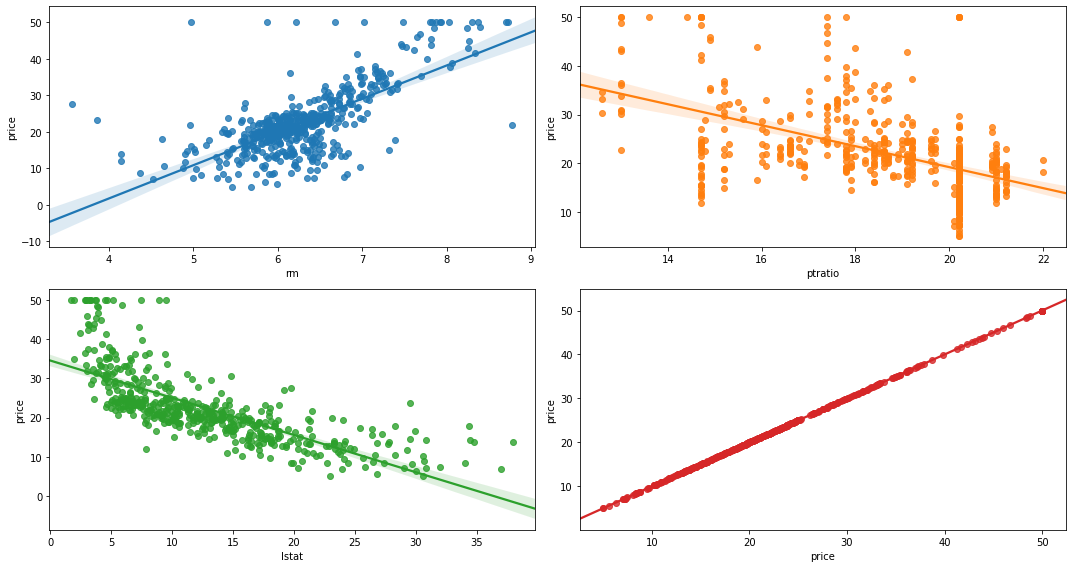

In [447]:
rows = 2
cols = 2

fig, ax = plt.subplots(nrows = rows, ncols = cols , figsize=(15,8))

col = correlated_data.columns
index = 0

for i in range(rows):
    for j in range(cols):
        sns.regplot(x = correlated_data[col[index]], y = correlated_data['price'], ax = ax[i][j])
        index += 1

plt.tight_layout()

# 6. Check accuracy with combinations

### Let's pick those columns with correlation greater then 60 against price columns

In [376]:
cormat['price']

crim      -0.388305
zn         0.360445
indus     -0.483725
chas       0.175260
nox       -0.427321
rm         0.695360
age       -0.376955
dis        0.249929
rad       -0.381626
tax       -0.468536
ptratio   -0.507787
b          0.333461
lstat     -0.737663
price      1.000000
Name: price, dtype: float64

In [448]:
# select those value with correlation > 60
threshold = 0.60
cor_value_60 = getCorrelatedFeature(cormat['price'], threshold)
cor_value_60

,Corr value
rm,0.695360
lstat,-0.737663
price,1.000000


In [450]:
# selecting those column which are > 60 from the main datafarme(boston_df)

correlated_data = boston_df[cor_value_60.index]
correlated_data.head()

,rm,lstat,price
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


### Generic method to train the model

In [451]:
def get_prediciton(data):
    x = data.drop('price', axis = 1)
    y = data['price']
    
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 0)
    
    model = LinearRegression()
    model.fit(x_train, y_train)
    
    y_predict = model.predict(x_test)
    return y_predict

In [452]:
y_predict = get_prediciton(correlated_data)

In [453]:
# get the performance metrice with the method we have written
performance_metrics(correlated_data.columns.values, threshold, y_test, y_target)

,Feature name,total no of feature,Correlation value,MAE,MSE,R2_score
0,['rm' 'ptratio' 'lstat' 'price'],3,0.5,4.28078,30.0529,0.695906
1,['rm' 'lstat' 'price'],2,0.6,8.92625,135.863,-0.374748


### Let's pick those columns with correlation greater then 70 against price columns

In [457]:
threshold = 0.70
cor_value_70 = getCorrelatedFeature(cormat['price'], threshold)
cor_value_70

,Corr value
lstat,-0.737663
price,1.000000


In [463]:
correlated_data = boston_df[cor_value_70.index]
correlated_data.head()

,lstat,price
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2


In [464]:
y_predict = get_prediciton(correlated_data)

In [465]:
performance_metrics(correlated_data.columns.values, threshold, x_test, y_predict)

,Feature name,total no of feature,Correlation value,MAE,MSE,R2_score
0,['rm' 'ptratio' 'lstat' 'price'],3,0.5,4.28078,30.0529,0.695906
1,['rm' 'lstat' 'price'],2,0.6,8.92625,135.863,-0.374748
2,"RangeIndex(start=0, stop=506, step=1)",505,0.7,9.17383,139.109,-0.407594
3,['lstat' 'price'],1,0.7,9.17383,139.109,-0.407594
